## tarea 7

Calcule la siguiente integral

∫10.1dxln(x)cos2(x)+tanh(x)−−−−−−−−−−−−−−√ 

Hágalo usando la cuadratura adaptativa de la clase pasada y el integrador de scipy. Grafique los tiempos que tardan ambos en función de la precisión pedida.

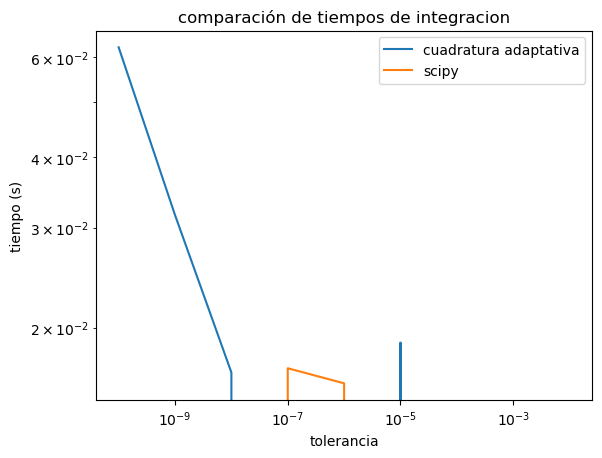

In [8]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import time 

def f(x):
    return np.log(40) * x**41 / np.sqrt(np.cos(40*x)**2 + np.tanh(40*x))

def adaptive_simpson(f, a, b, tol):
    def simpson(f, a, b):
        h = b - a
        c = (a + b) / 2
        return (h / 6) * (f(a) + 4*f(c) + f(b))

    def adaptive_simpson_recursive(f, a, b, tol):
        S = simpson(f, a, b)
        S_mid = simpson(f, a, (a+b)/2) + simpson(f, (a+b)/2, b)
        error = abs(S - S_mid) / 15
        if error <= tol:
            return S
        else:
            return adaptive_simpson_recursive(f, a, (a+b)/2, tol/2) + \
                   adaptive_simpson_recursive(f, (a+b)/2, b, tol/2)

    return adaptive_simpson_recursive(f, a, b, tol)

# parametros
a = 0.1
b = 1
tol_values = np.logspace(-2, -10, 9)  # Valores de tolerancia

# calculo de los tiempos
times_adaptive = []
times_scipy = []
for tol in tol_values:
    #cuadratura adaptativa
    start = time.time()
    result_adaptive = adaptive_simpson(f, a, b, tol)
    end = time.time()
    times_adaptive.append(end - start)

    # scipy
    start = time.time()
    result_scipy, error = quad(f, a, b, epsabs=tol)
    end = time.time()
    times_scipy.append(end - start)

# grafico
plt.loglog(tol_values, times_adaptive, label='cuadratura adaptativa')
plt.loglog(tol_values, times_scipy, label='scipy')
plt.xlabel('tolerancia')
plt.ylabel('tiempo (s)')
plt.legend()
plt.title('comparación de tiempos de integracion')
plt.show()


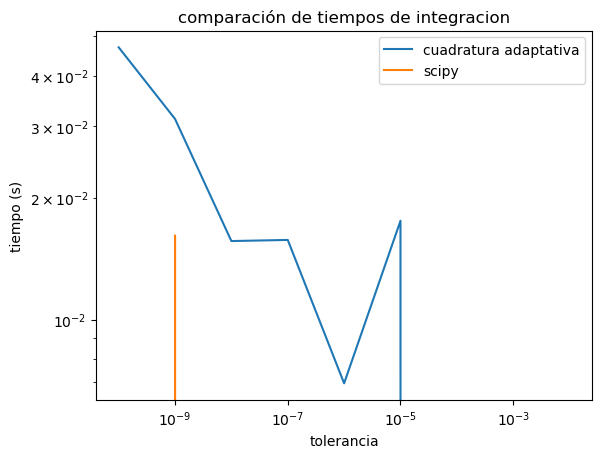

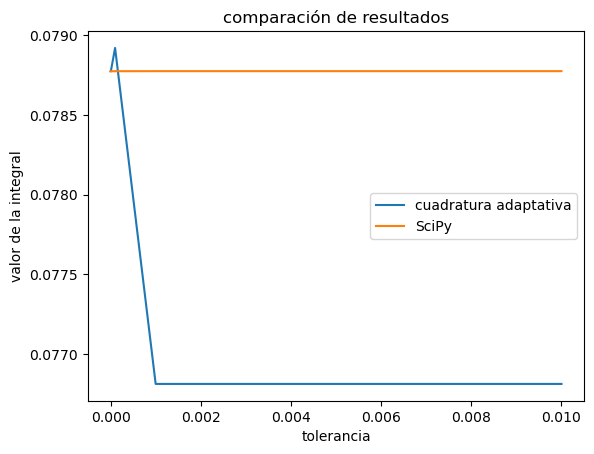

In [7]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import time

def f(x):
    """
    define la funcion a integrar.
    """
    return np.log(40) * x**41 / np.sqrt(np.cos(40*x)**2 + np.tanh(40*x))

def adaptive_simpson(f, a, b, tol):
    """
    implementa la cuadratura adaptativa de simpson.

    Args:
        f: la funcion a integrar.
        a: limite inferior de integracion.
        b: limite superior de integracion.
        tol: tolerancia del error.

    Returns:
        aproximacion de la integral.
    """

    def simpson(f, a, b):
        """
        calcula la aproximacion de la integral usando la regla de simpson.
        """
        h = b - a
        c = (a + b) / 2
        return (h / 6) * (f(a) + 4*f(c) + f(b))

    def adaptive_simpson_recursive(f, a, b, tol):
        """
        implementacion recursiva de la cuadratura adaptativa.
        """
        S = simpson(f, a, b)
        S_mid = simpson(f, a, (a+b)/2) + simpson(f, (a+b)/2, b)
        error = abs(S - S_mid) / 15
        if error <= tol:
            return S
        else:
            return adaptive_simpson_recursive(f, a, (a+b)/2, tol/2) + \
                   adaptive_simpson_recursive(f, (a+b)/2, b, tol/2)

    return adaptive_simpson_recursive(f, a, b, tol)

# parametros
a = 0.1
b = 1
tol_values = np.logspace(-2, -10, 9)  # valores de tolerancia

# cqlculo de los tiempos y resultados
times_adaptive = []
results_adaptive = []
times_scipy = []
results_scipy = []
for tol in tol_values:
    # cuadratura adaptativa
    start = time.time()
    result_adaptive = adaptive_simpson(f, a, b, tol)
    end = time.time()
    times_adaptive.append(end - start)
    results_adaptive.append(result_adaptive)

    # scipy
    start = time.time()
    result_scipy, error = quad(f, a, b, epsabs=tol)
    end = time.time()
    times_scipy.append(end - start)
    results_scipy.append(result_scipy)

# grafico de los tiempos
plt.loglog(tol_values, times_adaptive, label='cuadratura adaptativa')
plt.loglog(tol_values, times_scipy, label='scipy')
plt.xlabel('tolerancia')
plt.ylabel('tiempo (s)')
plt.legend()
plt.title('comparación de tiempos de integracion')
plt.show()

# grafico de los resultados
plt.plot(tol_values, results_adaptive, label='cuadratura adaptativa')
plt.plot(tol_values, results_scipy, label='SciPy')
plt.xlabel('tolerancia')
plt.ylabel('valor de la integral')
plt.legend()
plt.title('comparación de resultados')
plt.show()

